<a href="https://colab.research.google.com/github/lucaspn017/time_series_analysis/blob/main/Inpe%C3%A7%C3%A3o_dados_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

# **1. Carregamento e Inspeção dos Dados**

In [8]:
df = pd.read_csv('/content/SampleSuperstore.csv', encoding='latin1')
print(df.head())
print("\nInformações do Dataset:")
print(df.info())
print("\nEstatísticas Descritivas:")
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

# **2. Limpeza de Dados**

In [9]:
# Verificar valores nulos
print(df.isnull().sum())

# Remover duplicatas
df = df.drop_duplicates()

# Converter coluna de data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# **3. Análise Exploratória (EDA)**
## Distribuição Geográfica:

<ipython-input-10-b021d4eb7b0c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None)


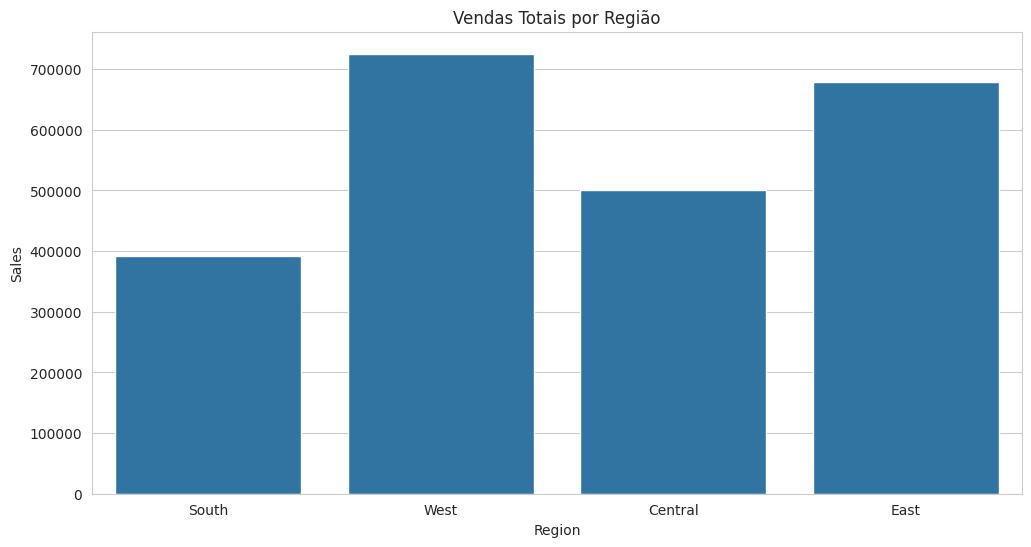

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Vendas Totais por Região')
plt.show()

##Produtos Mais Lucrativos:

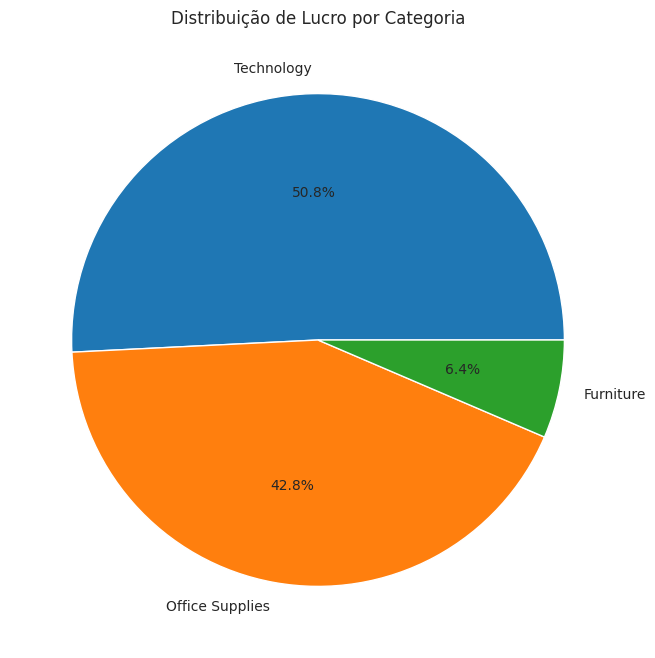

In [11]:
top_produtos = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
top_produtos.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribuição de Lucro por Categoria')
plt.ylabel('')
plt.show()

## Correlação entre Variáveis:

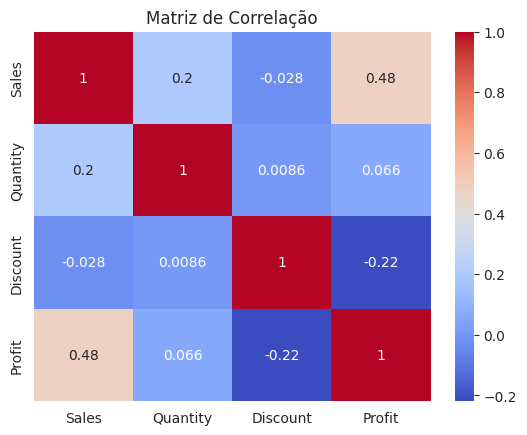

In [12]:
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# **4. Segmentação de Clientes (K-Means Clustering)**

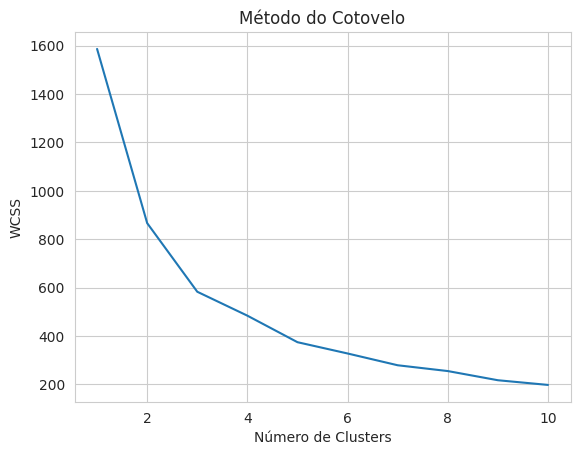

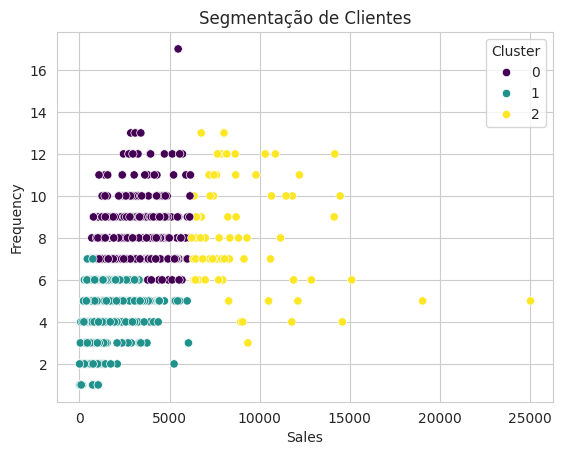

In [13]:
# Preparar dados
clientes = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Order Date': 'nunique'
}).rename(columns={'Order Date': 'Frequency'})

# Normalização
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes)

# Determinar número ótimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clientes_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clientes['Cluster'] = kmeans.fit_predict(clientes_scaled)

# Visualização
sns.scatterplot(x='Sales', y='Frequency', hue='Cluster', data=clientes, palette='viridis')
plt.title('Segmentação de Clientes')
plt.show()

# **5. Análise Temporal**

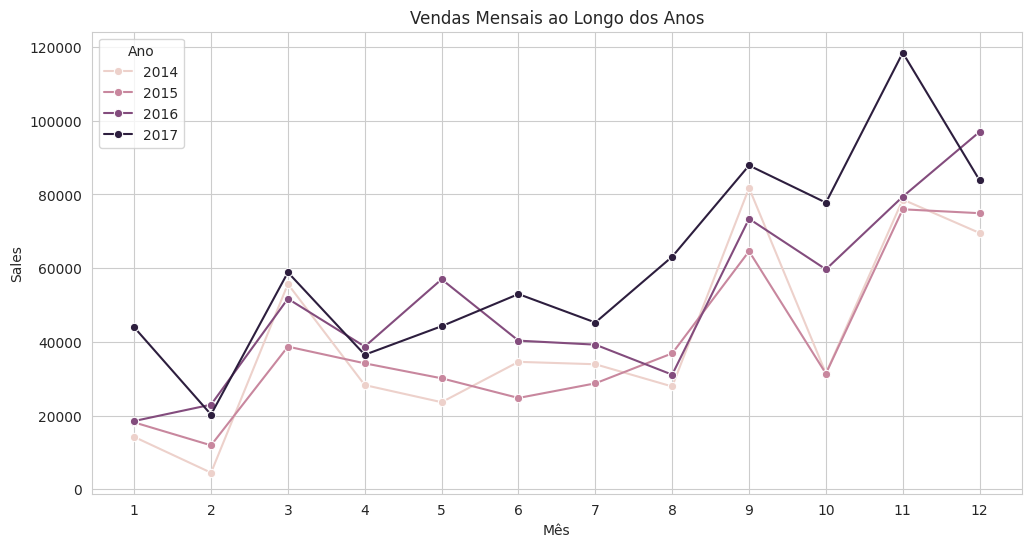

In [14]:
df['Ano'] = df['Order Date'].dt.year
df['Mês'] = df['Order Date'].dt.month

vendas_mensais = df.groupby(['Ano', 'Mês'])['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Mês', y='Sales', hue='Ano', data=vendas_mensais, marker='o')
plt.title('Vendas Mensais ao Longo dos Anos')
plt.xticks(range(1,13))
plt.show()

#**6. Análise de Lucratividade**

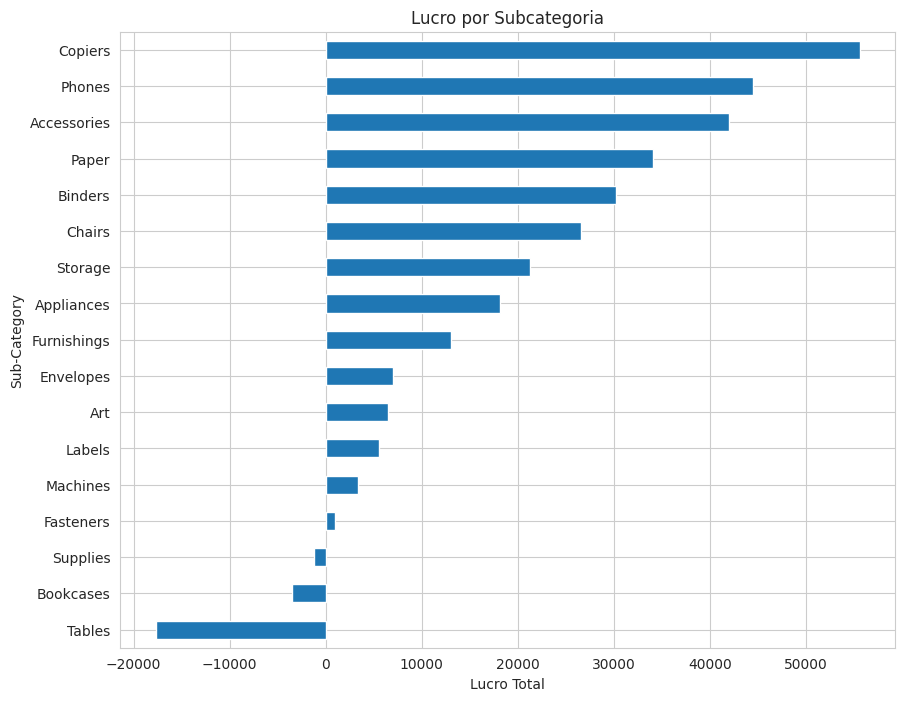

In [15]:
lucro_por_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values()
lucro_por_subcategoria.plot(kind='barh', figsize=(10,8))
plt.title('Lucro por Subcategoria')
plt.xlabel('Lucro Total')
plt.show()